# Stability of the Profile Characteristics

The main goal of the profile characteristics stability research area is to analyze how the volume characteristics frequently used to compute a host profile behavior evolve in time. To evaluate the stability of the characteristics used for profile computation, we employ the coefficient of variance.

### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ipaddress

from IPython.display import clear_output
from prettytable import PrettyTable


%matplotlib inline

### Definitions

In [2]:
servers = [ipaddress.ip_network('133.250.178.0/24'), ipaddress.ip_network('133.250.163.0/24')]
workstations = [ipaddress.ip_network('133.250.146.0/24'), ipaddress.ip_network('133.250.157.128/25')]

statistics_list = ['mean_of_means', 'mean_of_stds', 'mean_of_entropies']
views = ['business_day_talker', 'weekend_talker', 'business_day_talker_only','weekend_talker_only','all_week_talker','no_talker']
list_of_characteristics = ['Flows','Packets', 'Bytes', 'FlowDuration', 'Distinct-Peers', 'Distinct-Ports', 'Distinct-Protocols','Distinct-Country', 'Distinct-AS-numbers']

In [3]:
def return_selected_columns(list_of_network_ranges, columns):
    """
    Returns list of the selected IP addresses from the list of the network ranges. 
    The goal is to be able to select the subset of the original dataset based on 
    the list of IP ranges
    """
    selected_columns = []
    for column in columns:
        column_ip_object = ipaddress.ip_address(column)
        for network_range in list_of_network_ranges:
            if column_ip_object in network_range:
                selected_columns.append(column)
    return(selected_columns)

## Coefficent of variance

### Whole network with no profiling

In [4]:
coefficients = {}

# Iterate over characteristics 
for characteristics in list_of_characteristics:
    # Load characteristics dataset
    clear_output(wait=True)
    print("Loading characteristics: ", characteristics)
    filename = '../dataset/precomputed/' + characteristics + '-anon.pkl'
    df = pd.read_pickle(filename)

    # Compute aggregations
    print("Computing characteristics: ", characteristics)
    mean=df.agg(np.nanmean)
    std = df.agg(np.nanstd)
    # Compute coeficient of variance
    coef = std/mean
    coefficients[characteristics] = coef
    
clear_output(wait=True)
print("Computation finished")

Computation finished


+---------------------+--------+--------------------+
|   Characteristics   |  Mean  | Standard Deviation |
+---------------------+--------+--------------------+
|        Flows        | 1.140  |       1.684        |
|       Packets       | 2.688  |       4.526        |
|        Bytes        | 4.148  |       6.451        |
|     FlowDuration    | 11.159 |       21.272       |
|    Distinct-Peers   | 0.974  |       1.515        |
|    Distinct-Ports   | 1.516  |       2.697        |
|  Distinct-Protocols | 0.142  |       0.158        |
|   Distinct-Country  | 0.359  |       0.405        |
| Distinct-AS-numbers | 0.966  |       1.479        |
+---------------------+--------+--------------------+


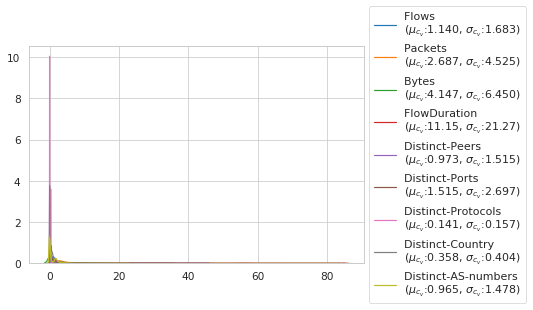

In [5]:
# Set plot style
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.2 )

# Init table for pretty print
t = PrettyTable(['Characteristics', 'Mean', 'Standard Deviation'])

# Iterate over the profile characteristics
for characteristics, df in coefficients.items():
    # Plot distribution of the coefficient of variance 
    sns.distplot(df.dropna(), bins=100, hist=False,label=characteristics + " \n(" + r'$\mu_{c_v}$:' + str(df.describe()['mean'])[:5] + ", " + r"$\sigma_{c_v}$:" + str(df.describe()['std'])[:5] + ")")
    # Add row to pretty print table
    t.add_row([characteristics, "{:.3f}".format(df.describe()['mean']),"{:.3f}".format(df.describe()['std'])])


# Print table with results
print(t)

# Show plot  
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=11)

#sns_plot.figure.savefig('./fig/Stability_all_no_profiling.svg')
plt.show()

### Whole network with week profiling

+---------------------+-------+--------------------+
|   Characteristics   |  Mean | Standard Deviation |
+---------------------+-------+--------------------+
|        Flows        | 0.990 |       0.721        |
|       Packets       | 1.571 |       1.154        |
|        Bytes        | 1.838 |       1.375        |
|     FlowDuration    | 1.710 |       2.301        |
|    Distinct-Peers   | 0.831 |       0.629        |
|    Distinct-Ports   | 0.908 |       0.962        |
|  Distinct-Protocols | 0.181 |       0.146        |
|   Distinct-Country  | 0.442 |       0.307        |
| Distinct-AS-numbers | 0.949 |       0.881        |
+---------------------+-------+--------------------+


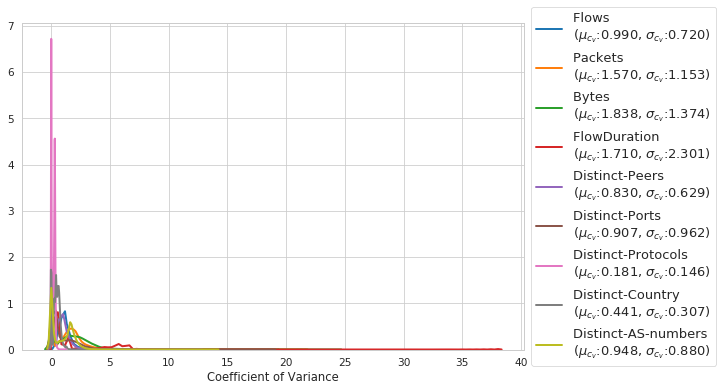

In [6]:
# Set plot style
plt.figure(figsize=(9,6))

# Init table for pretty print
t = PrettyTable(['Characteristics', 'Mean', 'Standard Deviation'])

# Iterate over the profile Characteristics and compute the coeficient of variance distributions
for characteristics in list_of_characteristics:
    # Info print
    clear_output(wait=True)
    print("Computing characteristics: ", characteristics)
    # Load dataset with profile characteristics
    filename = '../dataset/precomputed/' + characteristics + '-anon_ip_characterstics_stability.pkl'
    df = pd.read_pickle(filename)
    # Computer the variance coeficient 
    df['coef_var'] = df['mean_of_stds']/df['mean_of_means']
    # Plot data
    sns_plot = sns.distplot(df['coef_var'].dropna(), bins=100, hist=False,kde_kws=dict(linewidth=2),label=characteristics + " \n(" + r'$\mu_{c_v}$:' + str(df['coef_var'].describe()['mean'])[:5] + ", " + r"$\sigma_{c_v}$:" + str(df['coef_var'].describe()['std'])[:5] + ")")
    # Print mean and standard deviation
    t.add_row([characteristics,"{:.3f}".format(df['coef_var'].describe()['mean']),"{:.3f}".format(df['coef_var'].describe()['std'])]) 

# Print table with results
clear_output(wait=True)
print(t)

# Set plot properties
sns_plot.set(ylabel = "", xlabel="Coefficient of Variance")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=13)

#sns_plot.figure.savefig('./fig/Stability_all.svg')
plt.show()

### Workstation segment with week profiling

+---------------------+-------+--------------------+
|   Characteristics   |  Mean | Standard Deviation |
+---------------------+-------+--------------------+
|        Flows        | 1.405 |       0.541        |
|       Packets       | 2.278 |       0.873        |
|        Bytes        | 2.603 |       1.208        |
|     FlowDuration    | 1.471 |       1.935        |
|    Distinct-Peers   | 1.207 |       0.533        |
|    Distinct-Ports   | 1.289 |       1.115        |
|  Distinct-Protocols | 0.268 |       0.169        |
|   Distinct-Country  | 0.641 |       0.216        |
| Distinct-AS-numbers | 1.483 |       0.634        |
+---------------------+-------+--------------------+


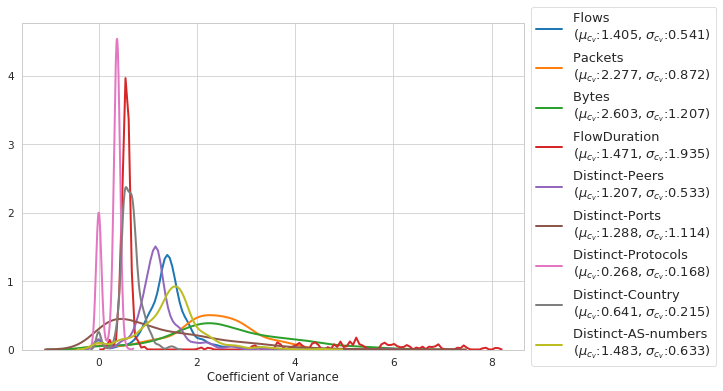

In [7]:
# Set plot style
plt.figure(figsize=(9,6))

# Init table for pretty print
t = PrettyTable(['Characteristics', 'Mean', 'Standard Deviation'])

# Iterate over the profile Characteristics and compute the coeficient of variance distributions
for characteristics in list_of_characteristics:
    # Info print
    clear_output(wait=True)
    print("Computing characteristics: ", characteristics)
    # Load dataset with profile characteristics
    filename = '../dataset/precomputed/' + characteristics + '-anon_ip_characterstics_stability.pkl'
    df = pd.read_pickle(filename)
    df = df.loc[return_selected_columns(workstations, df.index)]

    # Computer the variance coeficient 
    df['coef_var'] = df['mean_of_stds']/df['mean_of_means']
    # Plot data
    sns_plot = sns.distplot(df['coef_var'].dropna(), bins=100, hist=False,kde_kws=dict(linewidth=2),label=characteristics + " \n(" + r'$\mu_{c_v}$:' + str(df['coef_var'].describe()['mean'])[:5] + ", " + r"$\sigma_{c_v}$:" + str(df['coef_var'].describe()['std'])[:5] + ")")
    # Print mean and standard deviation
    t.add_row([characteristics,"{:.3f}".format(df['coef_var'].describe()['mean']),"{:.3f}".format(df['coef_var'].describe()['std'])]) 

# Print table with results
clear_output(wait=True)
print(t)

# Set plot properties
sns_plot.set(ylabel = "", xlabel="Coefficient of Variance")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=13)

#sns_plot.figure.savefig('./fig/Stability_workstations.svg')
plt.show()

### Servers with week profiling

+---------------------+-------+--------------------+
|   Characteristics   |  Mean | Standard Deviation |
+---------------------+-------+--------------------+
|        Flows        | 0.951 |       0.807        |
|       Packets       | 2.117 |       1.931        |
|        Bytes        | 2.242 |       2.092        |
|     FlowDuration    | 1.228 |       2.059        |
|    Distinct-Peers   | 0.691 |       0.612        |
|    Distinct-Ports   | 0.844 |       0.865        |
|  Distinct-Protocols | 0.156 |       0.135        |
|   Distinct-Country  | 0.427 |       0.412        |
| Distinct-AS-numbers | 1.037 |       0.706        |
+---------------------+-------+--------------------+


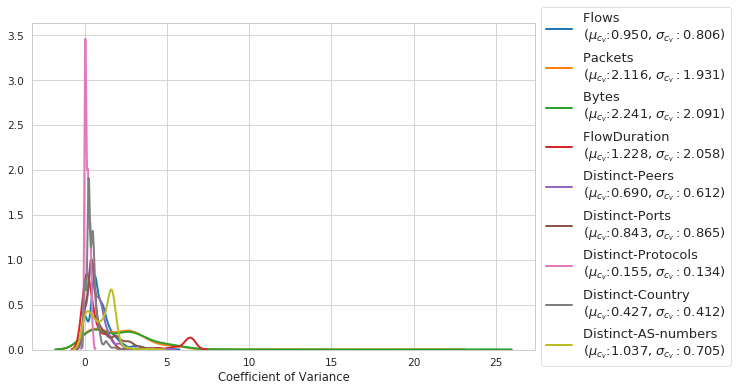

In [8]:
# Set plot style
plt.figure(figsize=(9,6))

# Init table for pretty print
t = PrettyTable(['Characteristics', 'Mean', 'Standard Deviation'])

# Iterate over the profile Characteristics and compute the coeficient of variance distributions
for characteristics in list_of_characteristics:
    # Info print
    clear_output(wait=True)
    print("Computing characteristics: ", characteristics)
    # Load dataset with profile characteristics
    filename = '../dataset/precomputed/' + characteristics + '-anon_ip_characterstics_stability.pkl'
    df = pd.read_pickle(filename)
    df = df.loc[return_selected_columns(servers, df.index)]

    # Computer the variance coeficient 
    df['coef_var'] = df['mean_of_stds']/df['mean_of_means']
    # Plot data
    sns_plot = sns.distplot(df['coef_var'].dropna(), bins=100, hist=False,kde_kws=dict(linewidth=2),label=characteristics + " \n(" + r'$\mu_{c_v}$:' + str(df['coef_var'].describe()['mean'])[:5] +", " + r"$\sigma_{c_v}:$"  + str(df['coef_var'].describe()['std'])[:5] + ")")
    # Print mean and standard deviation
    t.add_row([characteristics,"{:.3f}".format(df['coef_var'].describe()['mean']),"{:.3f}".format(df['coef_var'].describe()['std'])]) 

# Print table with results
clear_output(wait=True)
print(t)

# Set plot properties
sns_plot.set(ylabel = "", xlabel="Coefficient of Variance")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=13)

#sns_plot.figure.savefig('./fig/Stability_servers.svg')
plt.show()

# Clustering of the hosts according to the coeficients of the variance

#### Load datasets

In [9]:
final = pd.DataFrame()
# Load and concat datasets for characteristics 
for characteristic in list_of_characteristics:
    clear_output(wait=True)
    print("Loading characteristics: %s" % characteristic )
    filename = '../dataset/precomputed/' + characteristic + '-anon_ip_characterstics_stability.pkl'
    df = pd.read_pickle(filename)
    
    tmp = pd.DataFrame()
    tmp[characteristic] = df['mean_of_stds']/df['mean_of_means']
        
    final = pd.concat([final,tmp], axis = 1)

clear_output(wait=True)
cluster = final.fillna(0)
print("Loading Complete")

Loading Complete


### Elbow analysis for setting the DBSCAN hyperparameters

DescribeResult(nobs=5536, minmax=(0.44625465034121403, 15.554910022839977), mean=0.7315822087152669, variance=0.36817491796915536, skewness=11.477552641107058, kurtosis=203.62005716528424)


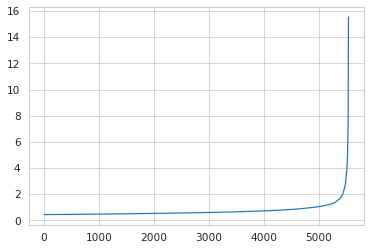

In [10]:
from sklearn.neighbors import NearestNeighbors
from scipy import stats


neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(cluster)
distances, indices = nbrs.kneighbors(cluster)

distances = np.sort(distances, axis=0)
plot_data = distances[60000:,1]
plt.plot(plot_data)

print(stats.describe(plot_data))

Set eps parameter based on the elbow analysis

In [11]:
min_pts = 100
eps = 0.36

### Fit clusters

In [12]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=eps, min_samples=min_pts).fit(cluster)

### Basic clustering stats

In [13]:
from sklearn import metrics

labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
     % metrics.silhouette_score(cluster, labels, sample_size=30000))

Estimated number of clusters: 7
Estimated number of noise points: 24365
Silhouette Coefficient: 0.385


### Radar chart

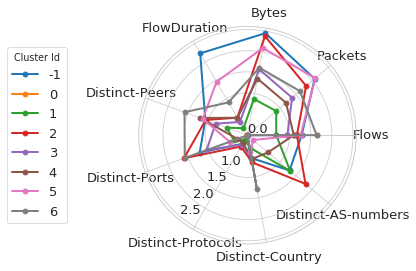

In [14]:
# Set plot basics
fig=plt.figure()
ax = fig.add_subplot(111, polar=True) 

# Compute centers of the clusters
cluster['labels'] = labels
grouped = cluster.groupby('labels').mean()
lbls = grouped.columns

# Set axis for the radar charts
angles=np.linspace(0, 2*np.pi, len(lbls), endpoint=False)
angles = np.concatenate((angles,[angles[0]]))

# Plot data
for i in grouped.index:
    stats = grouped.loc[i]
    stats = np.concatenate((stats,[stats[0]]))
    sns_plot = ax.plot(angles, stats, 'o-', linewidth=2, label=i)  # Draw the plot (or the frame on the radar chart)

# Set plot properties
xlabels = [0,1,1.5,2, 2.5]
ax.set_rticks(xlabels)
ax.set_thetagrids(angles * 180/np.pi, lbls)
ax.set_rlabel_position(-130)
ax.legend(loc='center right', bbox_to_anchor=(-0.3, 0.5),fontsize=13, title="Cluster Id")
ax.tick_params(labelsize=13)

plt.show()
#plt.savefig('./fig/Characteristics-spider-chart.svg')

### Radar chart zoomed

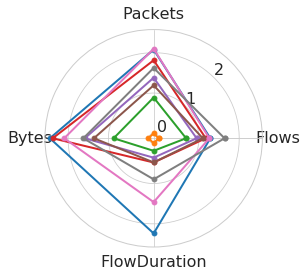

In [15]:
fig=plt.figure()
ax = fig.add_subplot(111, polar=True) 

# Compute centers of the clusters
grouped = cluster[['Flows', 'Packets', 'Bytes', "FlowDuration", 'labels']].groupby('labels').mean()
lbls = grouped.columns

# Set axis for the radar charts
angles=np.linspace(0, 2*np.pi, len(lbls), endpoint=False)
angles = np.concatenate((angles,[angles[0]]))

# Plot data
for i in grouped.index:
    stats = grouped.loc[i]
    stats = np.concatenate((stats,[stats[0]]))
    sns_plot = ax.plot(angles, stats, 'o-', linewidth=2, label=i)  # Draw the plot (or the frame on the radar chart)
    #ax.fill(angles, stats, alpha=0.25) 

# Set plot properties
xlabels = [0,1,2]
ax.set_rticks(xlabels)
ax.set_thetagrids(angles * 180/np.pi, lbls)
ax.set_rlabel_position(45)
ax.tick_params(labelsize=16)

#plt.savefig('./fig/Characteristics-spider-chart-zoom.svg')
plt.show()